In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")

# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 16 octobre 2024, 13h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Benjamin Deporte

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [3]:
# the wav file was recorded by the app "Super Sound" (sic) on my Android phone
# file format : WAV
# sampling rate : 44.1 kHz
# debit : 320 Kbps
# mono

In [4]:
import os

# form path to wav file
filename = 'devils_trick.wav'
# filename = 'coloniedefourmies.wav'
filepath = os.getcwd() + '/' + filename

# read the wav file
with open(filepath,'rb') as f:
    rate, wavdata = scipy.io.wavfile.read(f)
    
# listen to that outstanding bass voice
ipd.Audio(wavdata, rate=rate)

# 'the biggest trick the devil ever pulled, was convincing people he didn't exist" (Usual suspects)

<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

The python data type of the WAV file is <class 'numpy.ndarray'>
wavdata shape is (277186,)
wavdata sampling rate is 44100 Hz


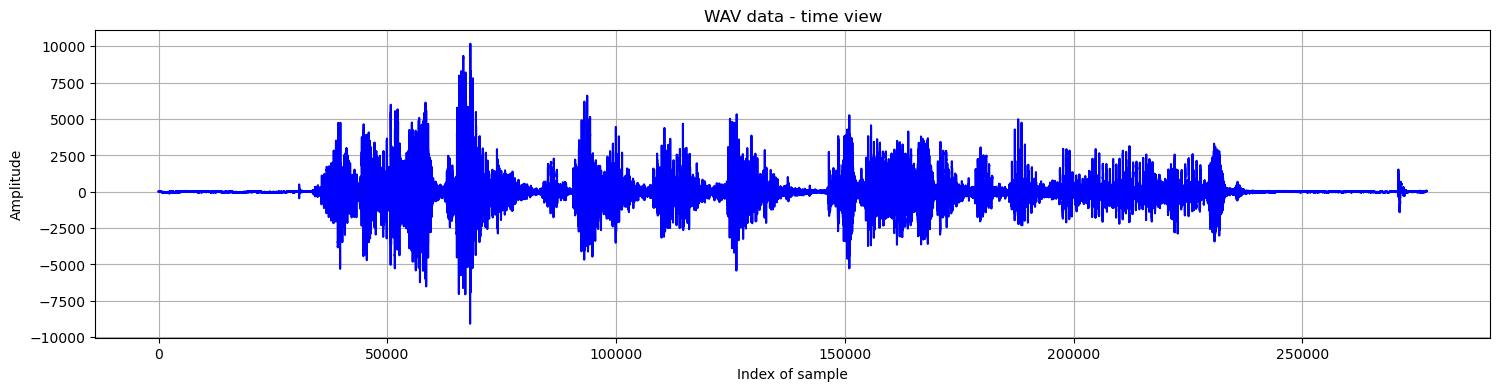

In [6]:
print(f'The python data type of the WAV file is {type(wavdata)}')
print(f'wavdata shape is {wavdata.shape}')
print(f'wavdata sampling rate is {rate} Hz')

fig, ax = plt.subplots(figsize=(18,4))

ax.plot(wavdata, label='wav data', color='blue')
ax.set_title(f'WAV data - time view')
ax.set_xlabel(f'Index of sample')
ax.set_ylabel(f'Amplitude')
ax.grid(True)

plt.show()

The time view is a plot of the sampled signal over time.

The sampling frequency is fe = 44100 Hz, and we have N = 277186 samples, so total T = N / fe ~ 6.28 s

The display shows clearly moments of silence, low intensity and higher volume voice.

Below is a Python survival kit to compute Fourier transform (not part of the TP, just for my future reference :-) )

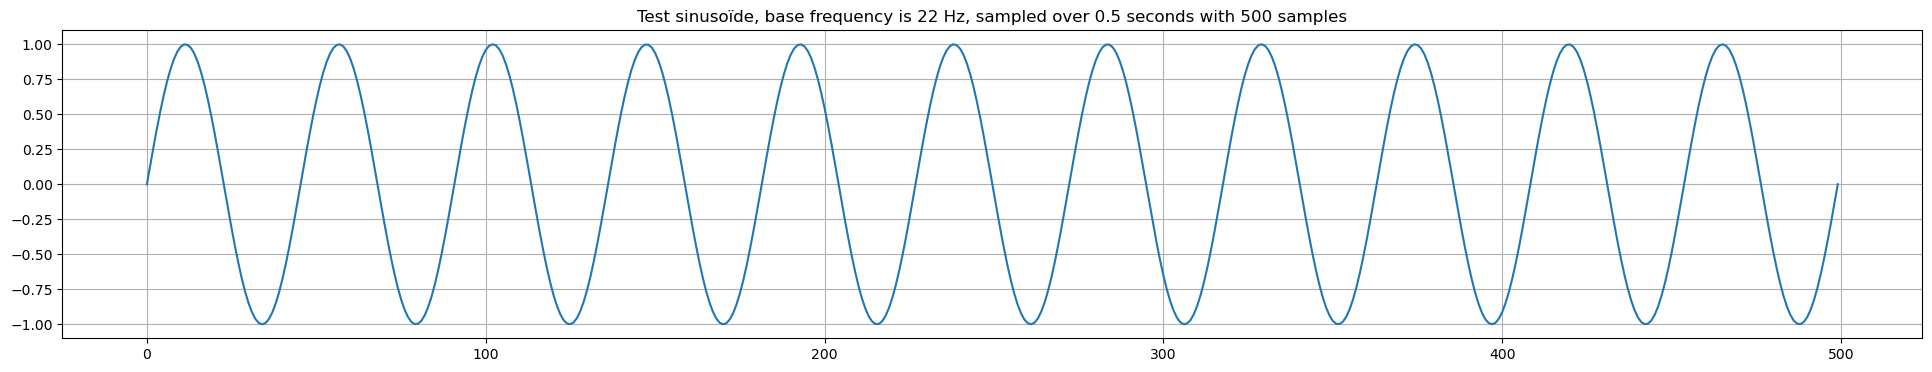

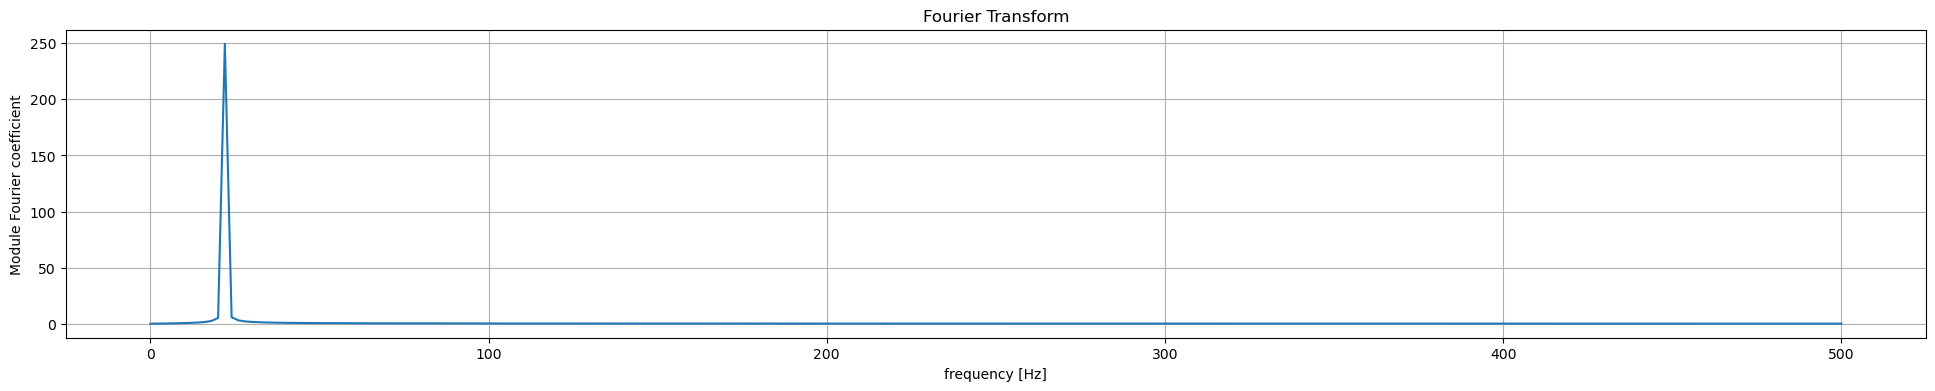

argmax frequency : 22.0 Hz


In [9]:
# import specific functions for FFT
from scipy.fft import rfft, rfftfreq

# paramètres of the test sinusoïde
N = 500  # number of samples
fe = 1000 # fréquence échantillonage
duration = N/fe  # durée du signal

# generate sinusoïde
f = 22  # sine wave frequency in hz
x = np.sin(2*np.pi*f*np.linspace(start=0, stop=duration, num=N))
fig, ax = plt.subplots(figsize=(24,4))
ax.plot(x)
ax.grid(True)
ax.set_title(f'Test sinusoïde, base frequency is {f} Hz, sampled over {duration} seconds with {N} samples')

# transformée de Fourier
# NB : rfft et rfftfreq travaillent sur 0:N//2, ie fréquences positives
yf = rfft(x)   # calcule les coefficients complexes 
xf = rfftfreq(N) # calcule les fréquences correspondantes

fig, ax = plt.subplots(figsize=(24,4))
ax.plot(xf * fe, np.abs(yf))  # Noter le *fe pour retrouver le domaine de fréquence originel, et le module complexe de yf
ax.set_title(f'Fourier Transform')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Module Fourier coefficient')
ax.grid(True)
plt.show()

# vérification :-)
print(f'argmax frequency : {xf[np.argmax(np.abs(yf))] * fe} Hz')

Back to the WAV sample

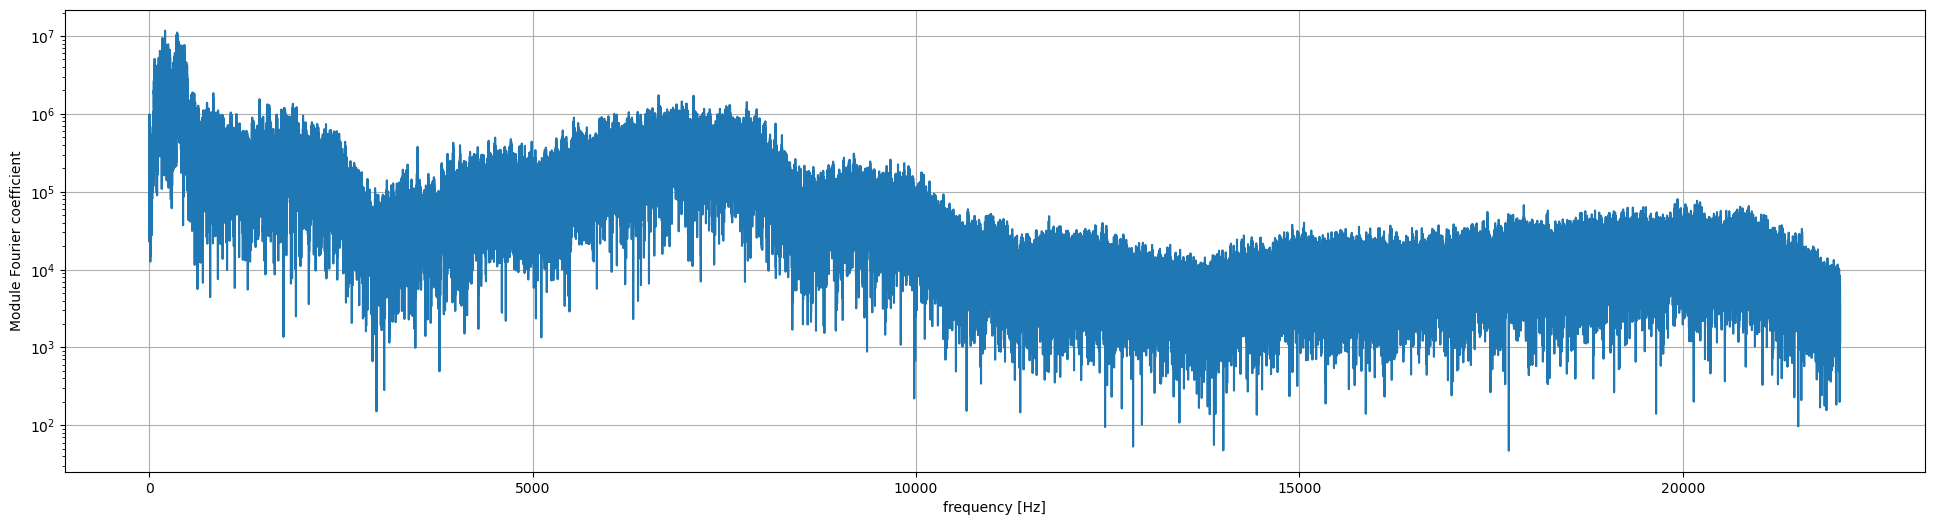

In [10]:
# Fourier analysis
from scipy.fft import rfft, rfftfreq

N = wavdata.shape[-1]  # number of samples
fe = 44100 # sampling frequency of the WAV sample

yf = rfft(wavdata)   # calculate complex Fourier coefficients
xf = rfftfreq(N) # get frequencies

fig, ax = plt.subplots(figsize=(24,6))
ax.plot(xf * fe, np.abs(yf))
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Module Fourier coefficient')
ax.grid(True)
plt.show()

As viewed in the course, we can't really say much about the Fourier transform over the entire non stationnary signal.

We can do Fourier transforms over shorter windows of time, this is the spectogram we'll be working on later in the notebook.

Densité Spectrale de Puissance

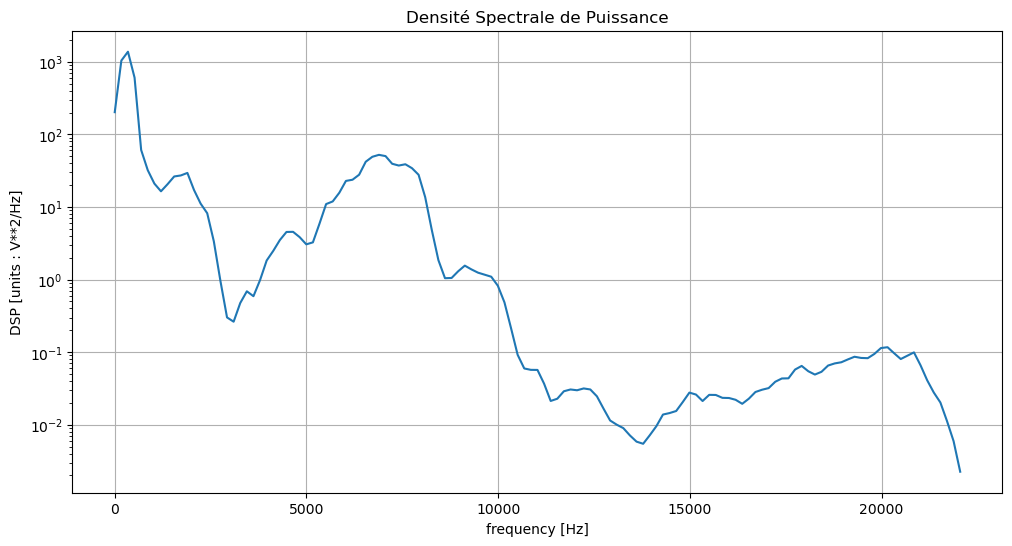

In [11]:
# Densité Spectrale de Puissance
# We have seen that computing the Fourier Transform can be misleading when computed over the entire signal

# welch is a function to calculate DSP
# welch returns 
# f : array of sample frequencies
# dsp : dsp spectrum of signal
from scipy.signal import welch

fe = 44100 # sampling frequency

# calculate DSP
f, dsp = welch(wavdata, fe)

# plot DSP
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(f, dsp)
ax.set_yscale('log')
ax.grid(True)
ax.set_title(f'Densité Spectrale de Puissance')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('DSP [units : V**2/Hz]')

plt.show()

The high DSP around 2 Hz is surpising. It might be an artefact of the recording, as there should be no sound at that frequency.

Besides this, the bulk of the mass of DSP is below 10 kHz. We also see the cutoff frequency at 22050 Hz.

The DSP is averaged over time with long periods of silence, we can't say much actually.

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Ne pas utiliser de méthode "toute faite" que vous pourriez par exemple trouver dans la bibliothèque librosa.

Commentez vos résultats.
    </div>

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [ ]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['signaux']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp\text{Signaux détectés comme positifs }}$$
et le rappel comme:
$$ \frac{\sharp\text{Signaux détectés comme contenant une impulsion qui en contiennent effectivement une}}{\sharp \text{Signaux contenant une impulsions}} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>